## Sai Baba Bheemishetty
US53017

### Exercise 1.
 Sentiment Analysis
This exercise will allow you to use PyTorch. Refer to the DATA 690 Resources.
1. Import the required libraries.
2. Load the dataset containing a set of 1,000 product reviews from Amazon, which are
paired with a label of 0 (for negative reviews) or 1 (for positive reviews). Get the data at
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences.
3. Separate the data into two variables: one containing the reviews and the other containing
the labels. Remove the punctuation from the reviews.
4. Create a variable containing the vocabulary of the entire set of reviews.
5. Additionally, create a dictionary that maps each word to an integer, where the words will
be the keys and the integers will be the values.
6. Encode the review data by replacing each word in a review for its paired integer.
7. Create a class containing the architecture of the network.
8. Make sure that you include an embedding layer. Initialize the model using 64 embedding
dimensions and 128 neurons for 3 LSTM layers.
9. Define the loss function, an optimization algorithm, and the number of epochs to train for.
For example, you can use binary cross-entropy loss as the loss function, the Adam
optimizer, and train for 10 epochs.
10. Create a for loop that goes through the different epochs and through every single
review individually. For each review, perform a prediction, calculate the loss function, and
update the parameters of the network. Additionally, calculate the accuracy of the network
over that training data.
11. Plot the progress of the loss function and accuracy over time.

In [108]:
#1. Importing all the Libraries and Packages

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split  # For data splitting
import matplotlib.pyplot as plt

Load the dataset containing a set of 1,000 product reviews from Amazon

In [71]:
import pandas as pd
import string

# Load the dataset
data = 'amazon_cells_labelled.txt'
column_names = ['review', 'label']
df = pd.read_csv(data, sep='\t', header=None, names=column_names)

In [72]:
print(df.head())

                                              review  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [73]:
# Step 3: Remove punctuation and split the data into reviews and labels.
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [74]:
df['review'] = df['review'].apply(remove_punctuation)
reviews = df['review'].values
labels = df['label'].values

In [75]:
df['review']

0      So there is no way for me to plug it in here i...
1                              Good case Excellent value
2                                  Great for the jawbone
3      Tied to charger for conversations lasting more...
4                                       The mic is great
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk I lose more calls on this...
997                          Item Does Not Match Picture
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit never w...
Name: review, Length: 1000, dtype: object

In [76]:
df['label']

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

In [77]:
# step 4 Create a vocabulary of the entire set of reviews
from collections import Counter

# Concatenate all the reviews into a single string
all_reviews_text = ' '.join(reviews)

# Tokenize the text into words
words = all_reviews_text.split()

# Create a Counter to count word frequencies
word_freq = Counter(words)

# Create a vocabulary list containing unique words
vocabulary = list(word_freq.keys())

# Print the size of the vocabulary
print("Vocabulary Size:", len(vocabulary))

# Optionally, you can print the first few words in the vocabulary
print("First Few Words in Vocabulary:", vocabulary[:10])


Vocabulary Size: 2220
First Few Words in Vocabulary: ['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it']


In [78]:
print(all_reviews_text)

So there is no way for me to plug it in here in the US unless I go by a converter Good case Excellent value Great for the jawbone Tied to charger for conversations lasting more than 45 minutesMAJOR PROBLEMS The mic is great I have to jiggle the plug to get it to line up right to get decent volume If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one If you are Razr owneryou must have this Needless to say I wasted my money What a waste of money and time And the sound quality is great He was very impressed when going from the original battery to the extended battery If the two were seperated by a mere 5 ft I started to notice excessive static and garbled sound from the headset Very good quality though The design is very odd as the ear clip is not very comfortable at all Highly recommend for any one who has a blue tooth phone I advise EVERYONE DO NOT BE FOOLED So Far So Good Works great It clicks into place in a way that makes you wo

In [79]:
print(word_freq)

Counter({'the': 414, 'and': 307, 'I': 306, 'is': 243, 'it': 219, 'a': 208, 'to': 196, 'this': 152, 'phone': 148, 'my': 130, 'of': 117, 'for': 116, 'with': 111, 'The': 97, 'not': 93, 'on': 88, 'was': 87, 'in': 85, 'very': 81, 'that': 76, 'have': 73, 'great': 66, 'It': 62, 'good': 61, 'you': 58, 'This': 53, 'product': 51, 'had': 48, 'quality': 44, 'headset': 44, 'as': 42, 'are': 41, 'but': 41, 'use': 41, 'one': 38, 'sound': 37, 'well': 36, 'ear': 34, 'all': 34, 'battery': 33, 'has': 33, 'from': 32, 'would': 32, 'your': 32, 'works': 32, 'work': 32, 'so': 32, 'Great': 31, 'like': 30, 'me': 28, 'case': 28, 'Ive': 28, 'than': 27, 'up': 26, 'time': 26, 'recommend': 26, 'price': 26, 'be': 26, 'or': 23, 'at': 23, 'its': 23, 'get': 22, 'out': 22, 'really': 22, '2': 21, 'service': 21, 'when': 20, 'only': 20, 'too': 20, 'Im': 20, 'am': 20, 'no': 19, 'charger': 19, 'money': 19, 'any': 19, 'can': 19, 'best': 19, 'does': 19, 'dont': 19, 'Its': 19, 'more': 18, 'about': 18, 'an': 18, 'Very': 17, 'new':

In [80]:
#  Step 5 Create a dictionary to map words to integers
word_to_int = {word: idx for idx, word in enumerate(vocabulary)}

# Print a few examples from the word_to_int dictionary
print("Word to Integer Dictionary (Sample):")
sample_mapping = {k: word_to_int[k] for k in list(word_to_int)[:10]}
print(sample_mapping)


Word to Integer Dictionary (Sample):
{'So': 0, 'there': 1, 'is': 2, 'no': 3, 'way': 4, 'for': 5, 'me': 6, 'to': 7, 'plug': 8, 'it': 9}


In [83]:
# Define a function to encode a single review
def encode_review(review):
    return [word_to_int.get(word, 0) for word in review.split()]

# Encode all the reviews using a list comprehension
encoded_reviews = [encode_review(review) for review in reviews]

# Print a sample encoded review
sample_encoded_review = encoded_reviews[0]
print("Sample Encoded Review:", sample_encoded_review)


Sample Encoded Review: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 19]


In [85]:
# Step 6
# converting the data to pytorch tensors and creating dataloader for creating a class in the next code cell
# Convert encoded_reviews to a list of tensors with padding
X = [torch.tensor(review) for review in encoded_reviews]
X = torch.nn.utils.rnn.pad_sequence(X, batch_first=True, padding_value=0)

# Convert labels to a tensor
y = torch.tensor(labels, dtype=torch.float32)

# Create a DataLoader
dataset = TensorDataset(X, y)
trainloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [86]:
import torch.nn as nn

class SentimentAnalysisModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers=3):
        super(SentimentAnalysisModel, self).__init__()

        # Embedding layer to convert word indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layers for sequence processing
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)

        # Fully connected layer for the final prediction
        self.fc = nn.Linear(hidden_dim, 1)

        # Sigmoid activation function for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Embed the input sequences
        embedded = self.embedding(x)

        # Pass the embedded sequences through LSTM layers
        lstm_out, _ = self.lstm(embedded)

        # Get the output at the last time step and pass through the linear layer
        out = self.fc(lstm_out[:, -1, :])

        # Apply sigmoid activation for binary classification
        out = self.sigmoid(out)
        return out

In [87]:
# Step 8 Initiate the model
model = SentimentAnalysisModel(len(vocabulary), 64, 128,1)

In [88]:
# Step 9 Define the loss function, an optimization algorithm, and the number of epochs to train
# Define the loss function
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification

# Define the optimization algorithm (e.g., Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs to train for (e.g., 10 epochs)
num_epochs = 10


In [90]:
# Step 10 Training the model
loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch_X, batch_y in trainloader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        predictions = (predictions >= 0.5).float()
        correct_predictions += (predictions == batch_y.unsqueeze(1)).sum().item()
        total_samples += batch_y.size(0)

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct_predictions / total_samples
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    print("Epoch [{}/{}] - Loss: {:.4f}, Accuracy: {:.4f}".format(epoch + 1, num_epochs, epoch_loss, epoch_accuracy))


Epoch [1/10] - Loss: 0.6929, Accuracy: 0.5000
Epoch [2/10] - Loss: 0.6943, Accuracy: 0.4800
Epoch [3/10] - Loss: 0.6929, Accuracy: 0.5010
Epoch [4/10] - Loss: 0.6926, Accuracy: 0.4980
Epoch [5/10] - Loss: 0.6929, Accuracy: 0.5170
Epoch [6/10] - Loss: 0.6921, Accuracy: 0.5340
Epoch [7/10] - Loss: 0.6897, Accuracy: 0.5210
Epoch [8/10] - Loss: 0.6595, Accuracy: 0.6440
Epoch [9/10] - Loss: 0.5924, Accuracy: 0.7070
Epoch [10/10] - Loss: 0.5245, Accuracy: 0.7620


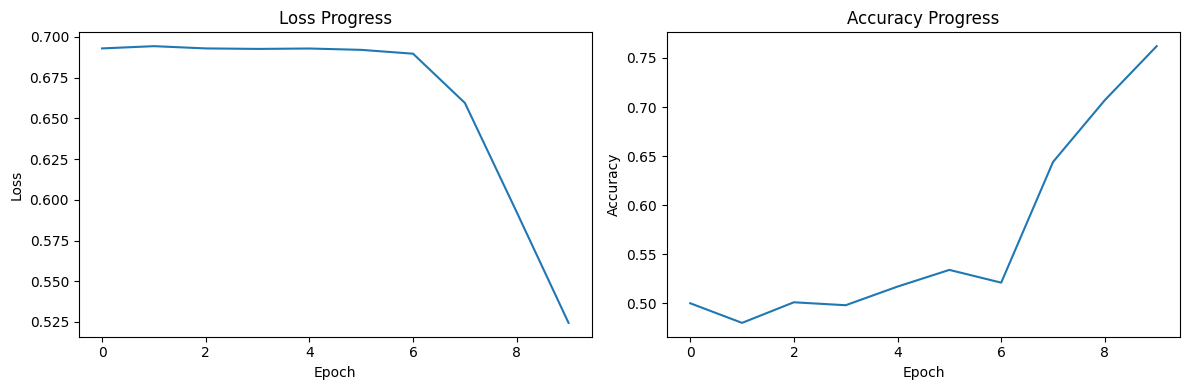

In [91]:
# Step 11 Plotting the Loss progress and Actual Progress Vs epoch
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss progress
ax1.plot(loss_history)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Progress')

# Plot accuracy progress
ax2.plot(accuracy_history)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Progress')

plt.tight_layout()
plt.show()


### **Exercise 2. **

Sentiment Analysis

Consider the following text:
sentence = “””The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front

DATA 690 2
suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails.”””
Perform the following task on the above sentences:
1. Replace special characters with empty spaces. You can use regex or any other method
2. Remove multiple empty spaces and replace them with a single space
3. Remove any single character
4. Convert the text to all lowercase
5. Split the text into individual words
6. Remove stopwords
7. Tokenize, stem, and lemmatize the text
6. What is the overall sentiment and subjectivity of the text

In [95]:
#Importing all the required Libraries and Packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import string
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [96]:
# Sample Text
text = '''The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front
suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails.'''

In [97]:
# 1. Replace special characters with empty spaces
sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)


In [98]:
# 2. Remove multiple empty spaces and replace them with a single space
sentence = re.sub(r'\s+', ' ', sentence)

In [99]:
# 3. Remove any single character
sentence = re.sub(r'\b\w\b', '', sentence)


In [100]:
# 4. Convert the text to all lowercase
sentence = sentence.lower()

In [101]:
# 5. Split the text into individual words
words = word_tokenize(sentence)

In [102]:
# 6. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]


In [104]:
# 7. Tokenize, stem, and lemmatize the text
stemmer = PorterStemmer()
stemmed_words = []

for word in filtered_words:
    stemmed_word = stemmer.stem(word)
    stemmed_words.append(stemmed_word)

In [106]:
# 8. Calculate the overall sentiment and subjectivity of the text using TextBlob
blob = TextBlob(' '.join(stemmed_words))
sentiment = blob.sentiment

In [107]:
# Print the cleaned text and sentiment analysis results
print("Cleaned Text:")
print(' '.join(stemmed_words))
print("\nSentiment Analysis:")
print(f"Polarity (Overall Sentiment): {sentiment.polarity}")
print(f"Subjectivity: {sentiment.subjectivity}")

Cleaned Text:
larger bronco avail 35 inch road tire abl drive water nearli feet 10 inch deep independ front suspens unlik main competitor jeep wrangler independ suspens use almost modern passeng vehicl gener provid smoother ride better road handl singl solid axl still solid axl back though like pickup truck design suit hard use like wrangler two four door bronco remov roof door buyer abl choos either hard roof remov section cloth top unlik wrangler though bronco door fit insid vehicl remov bronco avail choic either 10 speed automat seven speed manual transmiss manual transmiss six gear ordinari drive plu seventh low speed road drive power either 270 horsepow liter turbocharg cylind engin 310 horsepow liter turbocharg v6 new bronco suv design hard road use bronco sport quit hard core capabl also conveni featur truck like bronco base engin similar car like crossov suv ford say still intend seriou road use ford engin boast road test prototyp put includ drive deep sand steep inclin crawl a